# Link prediction - Exploration

In this notebook we will get you acquainted with the problem of link prediction. Roughly speaking, link prediction methods take a graph $G = (V, E)$ where the edge set $E$ is *incomplete*. The task of link prediction methods is then to point out likely missing edges from $E$. We will start looking at a simple graph where you probably see exactly where the missing links are.

**Exercise 1.** Write code to read the graph in the file ```graph_with_missing_links_1.gz```, and plot it. In this graph some arcs are missing. Try to identify by simply looking at the graph where arcs could be missing. What is the reason behing your choice?

Not a gzipped file (b'1 ')


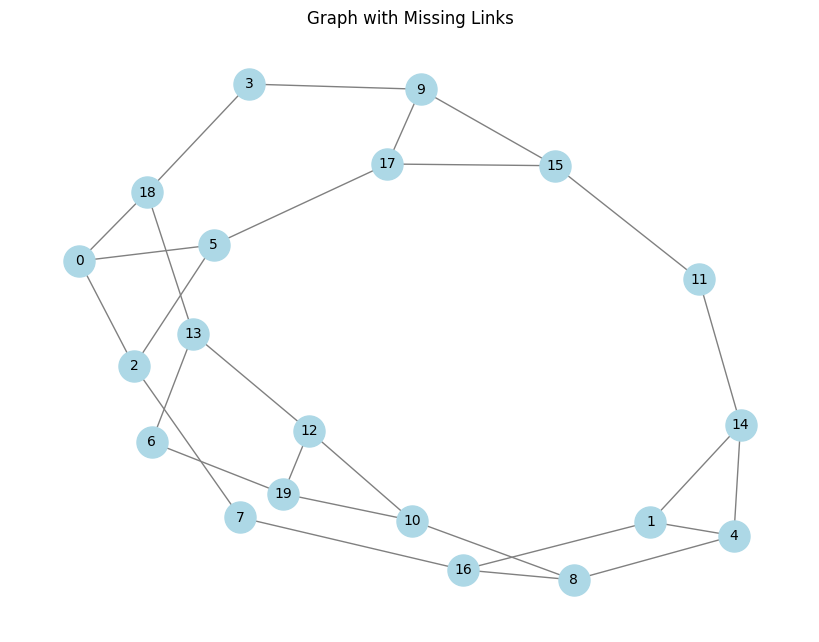

In [1]:
import networkx as nx

#Your answer goes here

import networkx as nx
import matplotlib.pyplot as plt
import gzip

# Load the graph from the compressed file
file_path = '/kaggle/input/network-statistics-for-data-science/graph_with_missing_links_1/graph_with_missing_links'

# Read the graph from the file
try:
    with gzip.open(file_path, 'rb') as f:
        G = nx.read_edgelist(f, delimiter=' ', create_using=nx.Graph())
except Exception as exc:
    print(exc)
    G = nx.read_edgelist(file_path, delimiter=' ', create_using=nx.Graph())
    
# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
plt.title("Graph with Missing Links")
plt.show()


**Exercise 2.** Write a function that puts your reasoning in previous question into practice. Ensure it outputs *one* edge that is most likely missing. Test your code on the previous graph. Does it output an edge you expected? If it did not: can you explain why?

The most likely missing edge is: ('1', '8')


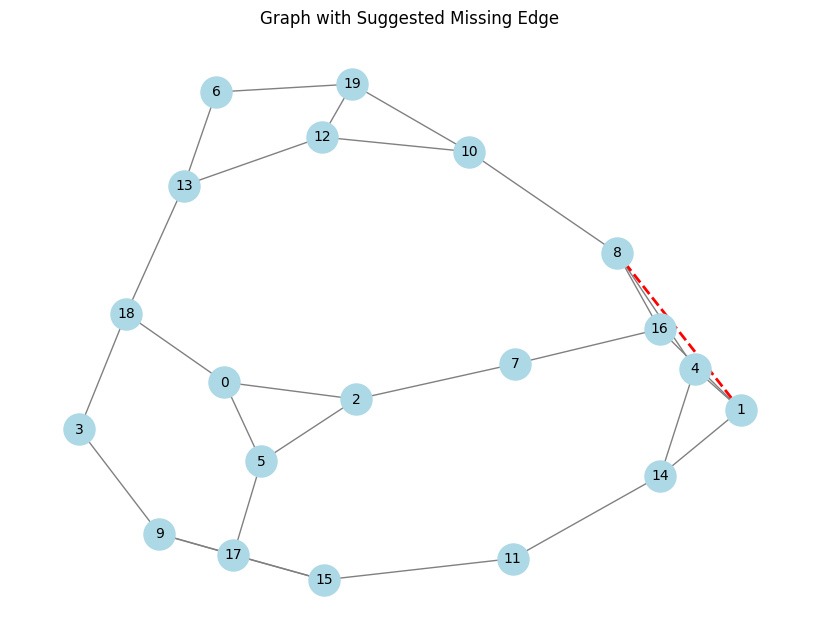

In [2]:
import networkx as nx

def findMissingEdge(G):
    # Initialize variables to store the most likely missing edge and the maximum number of common neighbors
    max_common_neighbors = -1
    missing_edge = (None, None)

    # Iterate through all pairs of nodes in the graph
    for u in G.nodes():
        for v in G.nodes():
            # Skip if the nodes are the same or if there is already an edge between them
            if u != v and not G.has_edge(u, v):
                # Compute the number of common neighbors
                common_neighbors = len(list(nx.common_neighbors(G, u, v)))
                
                # If the number of common neighbors is the highest found so far, update the missing edge
                if common_neighbors > max_common_neighbors:
                    max_common_neighbors = common_neighbors
                    missing_edge = (u, v)
    
    # Return the edge with the highest number of common neighbors
    return missing_edge

# Find the most likely missing edge
missing_edge = findMissingEdge(G)
print("The most likely missing edge is:", missing_edge)

# Plot the graph again with the missing edge suggestion highlighted
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
nx.draw_networkx_edges(G, pos, edgelist=[missing_edge], edge_color='red', width=2.0, style='dashed')
plt.title("Graph with Suggested Missing Edge")
plt.show()


The method you have just found probably works well on the previous graph, because it is quite regular. Maybe you can even guess how we generated it. Of course, real-life networks are often less regular, meaning your method might not be well suited for other networks. Let us try your method on a network on a network that is less regular.

**Exercise 3.** Try your method on the graph in the file ```graph_with_missing_links_2.gz```. We reveal we have removed links $\{0, 5\}, \{0, 6\}$ and $\{0, 7\}$. Did your method output one of these edges?

Not a gzipped file (b'0 ') 

The most likely missing edge is: ('4', '8')


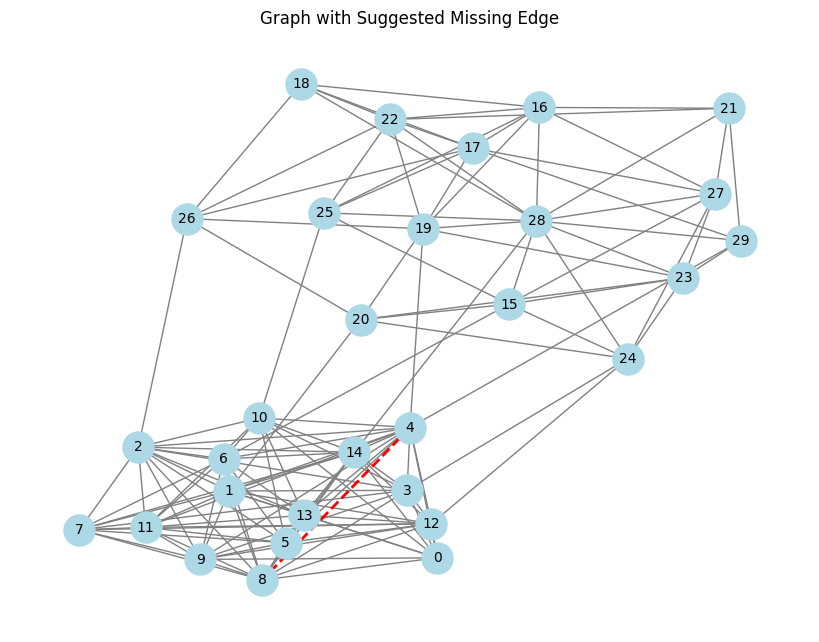

In [3]:
#Your answer goes here

import networkx as nx
import matplotlib.pyplot as plt
import gzip

def findMissingEdge(G):
    # Initialize variables to store the most likely missing edge and the maximum number of common neighbors
    max_common_neighbors = -1
    missing_edge = (None, None)

    # Iterate through all pairs of nodes in the graph
    for u in G.nodes():
        for v in G.nodes():
            # Skip if the nodes are the same or if there is already an edge between them
            if u != v and not G.has_edge(u, v):
                # Compute the number of common neighbors
                common_neighbors = len(list(nx.common_neighbors(G, u, v)))
                
                # If the number of common neighbors is the highest found so far, update the missing edge
                if common_neighbors > max_common_neighbors:
                    max_common_neighbors = common_neighbors
                    missing_edge = (u, v)
    
    # Return the edge with the highest number of common neighbors
    return missing_edge

# Load the graph from the new compressed file
try:
    file_path_2 = '/kaggle/input/network-statistics-for-data-science/graph_with_missing_links_2'
    with gzip.open(file_path_2, 'rb') as f:
        G2 = nx.read_edgelist(f, delimiter=' ', create_using=nx.Graph())
except Exception as exc:
    print(exc,"\n")
    G2 = nx.read_edgelist(file_path_2, delimiter=' ', create_using=nx.Graph())

        
# Find the most likely missing edge in the new graph
predicted_missing_edge = findMissingEdge(G2)
print("The most likely missing edge is:", predicted_missing_edge)

# Plot the graph again with the missing edge suggestion highlighted
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G2)
nx.draw(G2, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
nx.draw_networkx_edges(G2, pos, edgelist=[predicted_missing_edge], edge_color='red', width=2.0, style='dashed')
plt.title("Graph with Suggested Missing Edge")
plt.show()


We reveal that the graph of the previous exercise was generated with a stochastic block model with parameters $\vec{n} = (15, 15)$ and $$P = \begin{pmatrix}
0.8 & 0.05 \\
   0.05  & 0.4
\end{pmatrix}.$$ Note that all removed edges were moving from a vertex of block 1 to another vertex of block 1.

**Exercise 4.** Look back at the edge your method outputted in Exercise 3. Does it connect vertices of the same blocks? If it does not, can you think of a reason why it does not. Adapt your method, so it is better suited for stochastic block models, and test it on the graph from Exercise 3. Ensure your improved method does *not* input $\vec{n}$ or $P$.

Not a gzipped file (b'0 ') 

The most likely missing edge according to SBM method is: ('8', '4')


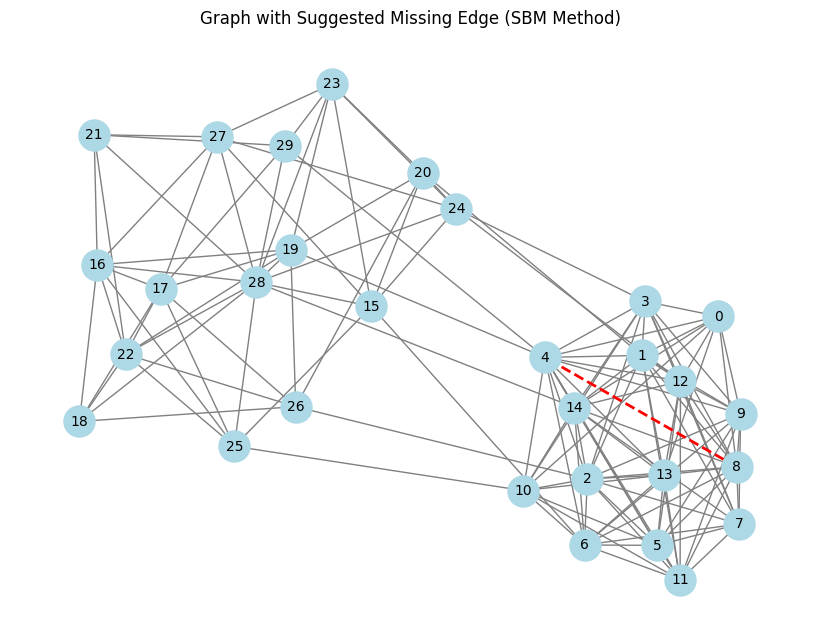

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import gzip
from networkx.algorithms import community

def predictLinkSBM(G):
    # Step 1: Detect communities using a community detection algorithm (Louvain method or Girvan-Newman)
    communities = list(community.greedy_modularity_communities(G))
    
    # Initialize variables to store the most likely missing edge and the maximum score
    max_common_neighbors = -1
    missing_edge = (None, None)
    
    # Step 2: Iterate over each detected community
    for community_nodes in communities:
        # Convert community_nodes set to a list for indexing
        community_nodes = list(community_nodes)
        
        # Step 3: For each pair of nodes in the community, find the missing edge with the highest common neighbors
        for i in range(len(community_nodes)):
            for j in range(i + 1, len(community_nodes)):
                u, v = community_nodes[i], community_nodes[j]
                if not G.has_edge(u, v):  # Check if edge is missing
                    # Compute the number of common neighbors
                    common_neighbors = len(list(nx.common_neighbors(G, u, v)))
                    
                    # Update the most likely missing edge if it has more common neighbors
                    if common_neighbors > max_common_neighbors:
                        max_common_neighbors = common_neighbors
                        missing_edge = (u, v)
    
    # Return the edge with the highest number of common neighbors within the same community
    return missing_edge

# Load the graph from the compressed file
try:
    file_path_2 = '/kaggle/input/network-statistics-for-data-science/graph_with_missing_links_2'
    with gzip.open(file_path_2, 'rb') as f:
        G2 = nx.read_edgelist(f, delimiter=' ', create_using=nx.Graph())
except Exception as exc:
    print(exc,"\n")
    G2 = nx.read_edgelist(file_path_2, delimiter=' ', create_using=nx.Graph())

# Find the most likely missing edge using the improved SBM method
predicted_missing_edge_sbm = predictLinkSBM(G2)
print("The most likely missing edge according to SBM method is:", predicted_missing_edge_sbm)

# Plot the graph again with the missing edge suggestion highlighted
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G2)
nx.draw(G2, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
nx.draw_networkx_edges(G2, pos, edgelist=[predicted_missing_edge_sbm], edge_color='red', width=2.0, style='dashed')
plt.title("Graph with Suggested Missing Edge (SBM Method)")
plt.show()


It is actually pretty weird that your methods only output *one* edge. In the examples before multiple edges were missing. In practice, you never know how many edges are missing. Moreover, it could be that the first edges your algorithm outputs is wrong while the subsequent ones are correct. Therefore, it makes more sense to give all edges a *score* (called its **reliability**) that measure how "ceartain" your can be this edge is missing from the graph.

**Exercise 5.** Rework your general and stochastic block model specific method to give each edge a reliability. Test your methods again on the two graphs. How high do the actual missing edges rank?

Not a gzipped file (b'1 ')
Not a gzipped file (b'0 ')
Top Missing Edges (General Method) for Graph 1
Rank 1: Edge ('1', '8') with reliability score 1.0000
Rank 2: Edge ('16', '4') with reliability score 1.0000
Rank 3: Edge ('4', '16') with reliability score 1.0000
Rank 4: Edge ('8', '1') with reliability score 1.0000
Rank 5: Edge ('12', '6') with reliability score 1.0000
Rank 6: Edge ('13', '19') with reliability score 1.0000
Rank 7: Edge ('19', '13') with reliability score 1.0000
Rank 8: Edge ('6', '12') with reliability score 1.0000
Rank 9: Edge ('1', '7') with reliability score 0.5000
Rank 10: Edge ('1', '11') with reliability score 0.5000

Top Missing Edges (SBM Method) for Graph 1
Rank 1: Edge ('16', '4') with reliability score 1.0000
Rank 2: Edge ('8', '1') with reliability score 1.0000
Rank 3: Edge ('19', '13') with reliability score 1.0000
Rank 4: Edge ('6', '12') with reliability score 1.0000
Rank 5: Edge ('17', '3') with reliability score 1.0000
Rank 6: Edge ('9', '18') with 

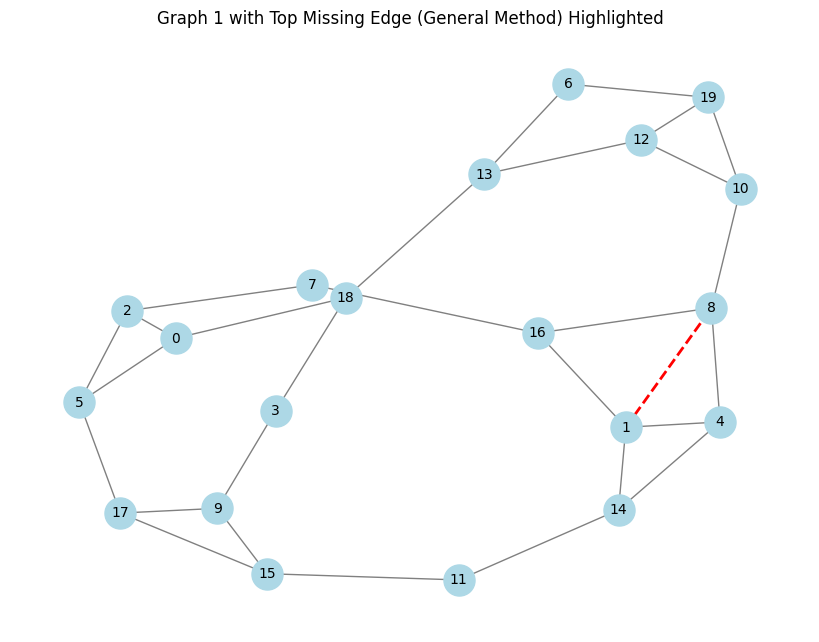

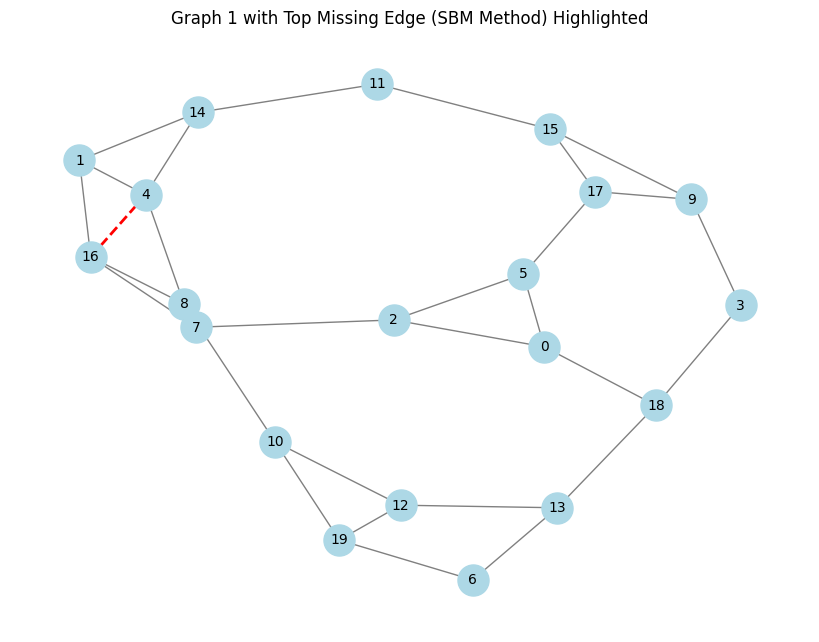

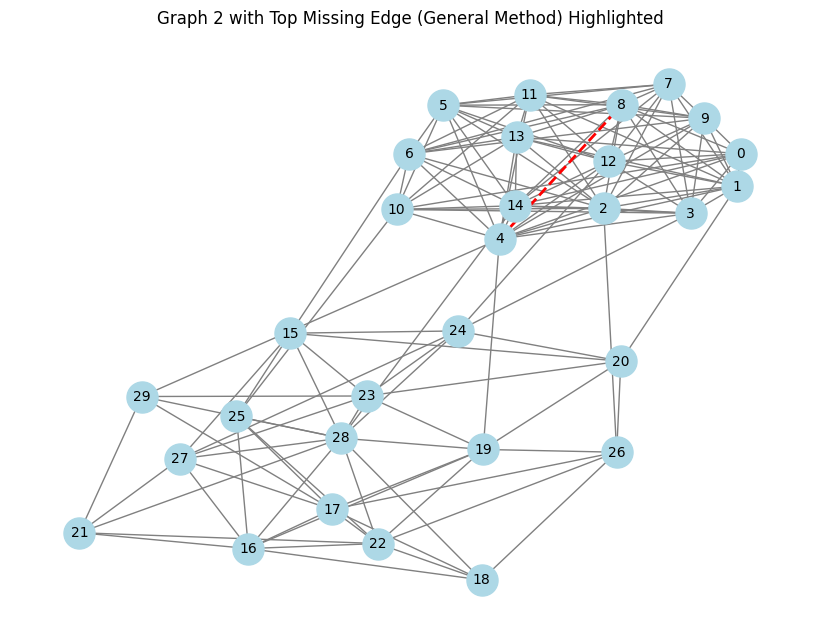

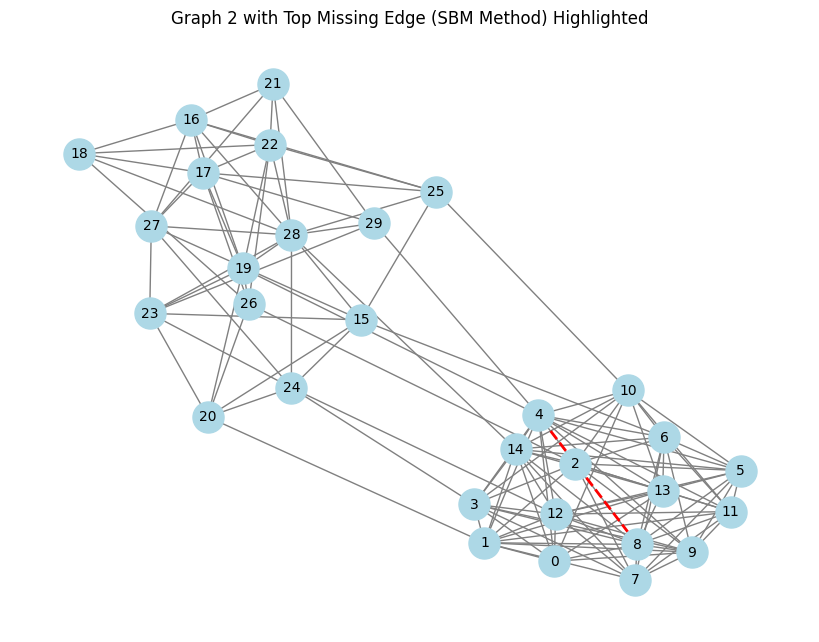

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import gzip
from networkx.algorithms import community

def compute_reliability_scores(G):
    # Initialize dictionary to store the reliability score for each potential missing edge
    reliability_scores = {}
    max_common_neighbors = 0

    # Compute common neighbors for all pairs of nodes and keep track of the maximum
    for u in G.nodes():
        for v in G.nodes():
            if u != v and not G.has_edge(u, v):
                # Calculate the number of common neighbors
                common_neighbors = len(list(nx.common_neighbors(G, u, v)))
                reliability_scores[(u, v)] = common_neighbors
                max_common_neighbors = max(max_common_neighbors, common_neighbors)

    # Normalize scores to be between 0 and 1
    for edge in reliability_scores:
        reliability_scores[edge] /= max_common_neighbors

    return reliability_scores

def compute_reliability_scores_sbm(G):
    # Detect communities in the graph using the Louvain method or Greedy Modularity
    communities = list(community.greedy_modularity_communities(G))
    
    # Initialize dictionary to store the reliability score for each potential missing edge
    reliability_scores = {}
    
    # Iterate over each detected community
    for community_nodes in communities:
        # Convert community_nodes set to a list for indexing
        community_nodes = list(community_nodes)
        
        # Compute common neighbors for all pairs of nodes within the community
        max_common_neighbors = 0
        community_scores = {}
        
        for i in range(len(community_nodes)):
            for j in range(i + 1, len(community_nodes)):
                u, v = community_nodes[i], community_nodes[j]
                if not G.has_edge(u, v):  # Check if edge is missing
                    # Calculate the number of common neighbors
                    common_neighbors = len(list(nx.common_neighbors(G, u, v)))
                    community_scores[(u, v)] = common_neighbors
                    max_common_neighbors = max(max_common_neighbors, common_neighbors)
        
        # Normalize scores within the community to be between 0 and 1
        for edge in community_scores:
            community_scores[edge] /= max_common_neighbors if max_common_neighbors > 0 else 1
            reliability_scores[edge] = community_scores[edge]
    
    return reliability_scores

def load_graph(file_path):
    # Load the graph from the compressed file
    try:
        with gzip.open(file_path, 'rb') as f:
            G = nx.read_edgelist(f, delimiter=' ', create_using=nx.Graph())
    except Exception as exc:
        print(exc)
        G = nx.read_edgelist(file_path, delimiter=' ', create_using=nx.Graph())
    return G

# Load and analyze the first graph
file_path_1 = '/kaggle/input/network-statistics-for-data-science/graph_with_missing_links_1/graph_with_missing_links'
G1 = load_graph(file_path_1)

# Load and analyze the second graph
file_path_2 = '/kaggle/input/network-statistics-for-data-science/graph_with_missing_links_2'
G2 = load_graph(file_path_2)

# Compute reliability scores for both graphs using both methods
reliability_scores_general_G1 = compute_reliability_scores(G1)
reliability_scores_sbm_G1 = compute_reliability_scores_sbm(G1)

reliability_scores_general_G2 = compute_reliability_scores(G2)
reliability_scores_sbm_G2 = compute_reliability_scores_sbm(G2)

# Sort and display the top-ranked missing edges for both graphs using both methods
def display_top_missing_edges(reliability_scores, title):
    sorted_edges = sorted(reliability_scores.items(), key=lambda x: x[1], reverse=True)
    print(title)
    for i, (edge, score) in enumerate(sorted_edges[:10]):  # Display top 10 edges
        print(f"Rank {i+1}: Edge {edge} with reliability score {score:.4f}")
    print()

# Display top missing edges for Graph 1
display_top_missing_edges(reliability_scores_general_G1, "Top Missing Edges (General Method) for Graph 1")
display_top_missing_edges(reliability_scores_sbm_G1, "Top Missing Edges (SBM Method) for Graph 1")

# Display top missing edges for Graph 2
display_top_missing_edges(reliability_scores_general_G2, "Top Missing Edges (General Method) for Graph 2")
display_top_missing_edges(reliability_scores_sbm_G2, "Top Missing Edges (SBM Method) for Graph 2")

# Plot graphs with top-ranked missing edges highlighted
def plot_graph_with_edges(G, edges_to_highlight, title):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
    nx.draw_networkx_edges(G, pos, edgelist=edges_to_highlight, edge_color='red', width=2.0, style='dashed')
    plt.title(title)
    plt.show()

# Highlight top missing edge from general method in Graph 1
top_edge_general_G1 = max(reliability_scores_general_G1, key=reliability_scores_general_G1.get)
plot_graph_with_edges(G1, [top_edge_general_G1], "Graph 1 with Top Missing Edge (General Method) Highlighted")

# Highlight top missing edge from SBM method in Graph 1
top_edge_sbm_G1 = max(reliability_scores_sbm_G1, key=reliability_scores_sbm_G1.get)
plot_graph_with_edges(G1, [top_edge_sbm_G1], "Graph 1 with Top Missing Edge (SBM Method) Highlighted")

# Similarly, plot for Graph 2
top_edge_general_G2 = max(reliability_scores_general_G2, key=reliability_scores_general_G2.get)
plot_graph_with_edges(G2, [top_edge_general_G2], "Graph 2 with Top Missing Edge (General Method) Highlighted")

top_edge_sbm_G2 = max(reliability_scores_sbm_G2, key=reliability_scores_sbm_G2.get)
plot_graph_with_edges(G2, [top_edge_sbm_G2], "Graph 2 with Top Missing Edge (SBM Method) Highlighted")


We end by testing your new methods on a real-life network. From this network we have removed edge $\{13, 33\}$ and $\{2, 3\}$.

**Exercise 6.** Load the graph ```graph_with_missing_links_3.gz```, and apply both your link prediction methods on this graph. Which method has performed better? Think of reasons why this method has performed better on this real-life network. Can you think of real-life networks where the other method might have been better?

Not a gzipped file (b'0 ')
Top Missing Edges (General Method) for Graph 3
Rank 1: Edge ('2', '33') with reliability score 1.0000
Rank 2: Edge ('33', '2') with reliability score 1.0000
Rank 3: Edge ('2', '3') with reliability score 0.8000
Rank 4: Edge ('3', '2') with reliability score 0.8000
Rank 5: Edge ('7', '13') with reliability score 0.8000
Rank 6: Edge ('13', '7') with reliability score 0.8000
Rank 7: Edge ('0', '32') with reliability score 0.6000
Rank 8: Edge ('0', '33') with reliability score 0.6000
Rank 9: Edge ('1', '8') with reliability score 0.6000
Rank 10: Edge ('2', '31') with reliability score 0.6000

Top Missing Edges (SBM Method) for Graph 3
Rank 1: Edge ('7', '13') with reliability score 1.0000
Rank 2: Edge ('32', '27') with reliability score 1.0000
Rank 3: Edge ('28', '9') with reliability score 1.0000
Rank 4: Edge ('10', '6') with reliability score 0.7500
Rank 5: Edge ('4', '5') with reliability score 0.7500
Rank 6: Edge ('22', '30') with reliability score 0.6667
Ran

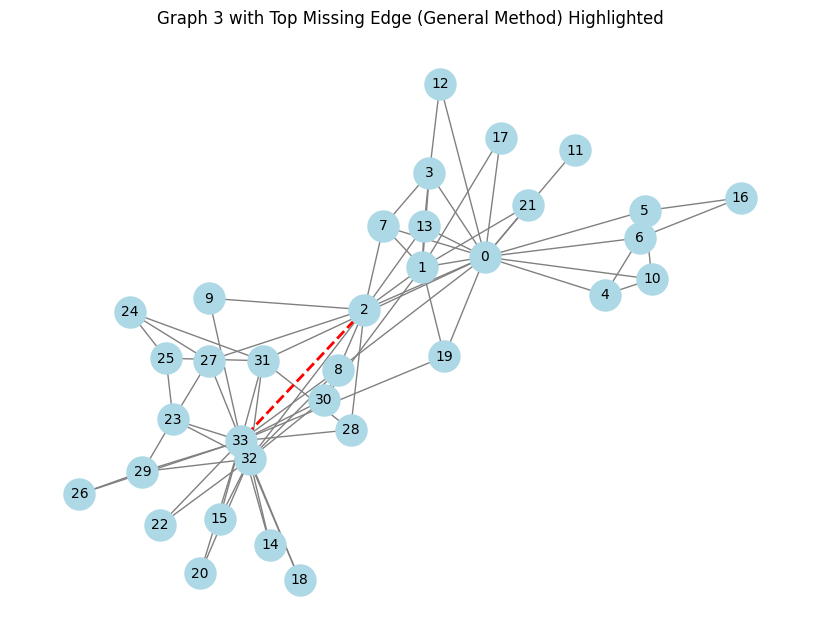

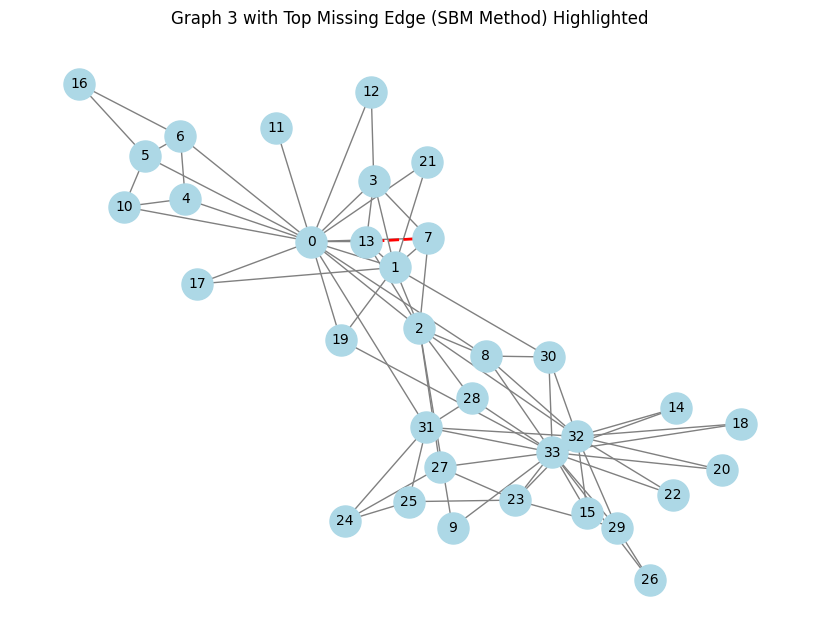

In [6]:
#Your answer goes here.

import networkx as nx
import matplotlib.pyplot as plt
import gzip
from networkx.algorithms import community

# Reuse functions from the previous implementation

def compute_reliability_scores(G):
    # Initialize dictionary to store the reliability score for each potential missing edge
    reliability_scores = {}
    max_common_neighbors = 0

    # Compute common neighbors for all pairs of nodes and keep track of the maximum
    for u in G.nodes():
        for v in G.nodes():
            if u != v and not G.has_edge(u, v):
                # Calculate the number of common neighbors
                common_neighbors = len(list(nx.common_neighbors(G, u, v)))
                reliability_scores[(u, v)] = common_neighbors
                max_common_neighbors = max(max_common_neighbors, common_neighbors)

    # Normalize scores to be between 0 and 1
    for edge in reliability_scores:
        reliability_scores[edge] /= max_common_neighbors

    return reliability_scores

def compute_reliability_scores_sbm(G):
    # Detect communities in the graph using the Louvain method or Greedy Modularity
    communities = list(community.greedy_modularity_communities(G))
    
    # Initialize dictionary to store the reliability score for each potential missing edge
    reliability_scores = {}
    
    # Iterate over each detected community
    for community_nodes in communities:
        # Convert community_nodes set to a list for indexing
        community_nodes = list(community_nodes)
        
        # Compute common neighbors for all pairs of nodes within the community
        max_common_neighbors = 0
        community_scores = {}
        
        for i in range(len(community_nodes)):
            for j in range(i + 1, len(community_nodes)):
                u, v = community_nodes[i], community_nodes[j]
                if not G.has_edge(u, v):  # Check if edge is missing
                    # Calculate the number of common neighbors
                    common_neighbors = len(list(nx.common_neighbors(G, u, v)))
                    community_scores[(u, v)] = common_neighbors
                    max_common_neighbors = max(max_common_neighbors, common_neighbors)
        
        # Normalize scores within the community to be between 0 and 1
        for edge in community_scores:
            community_scores[edge] /= max_common_neighbors if max_common_neighbors > 0 else 1
            reliability_scores[edge] = community_scores[edge]
    
    return reliability_scores

def load_graph(file_path):
    # Load the graph from the compressed file
    try:
        with gzip.open(file_path, 'rb') as f:
            G = nx.read_edgelist(f, delimiter=' ', create_using=nx.Graph())
    except Exception as exc:
        print(exc)
        G = nx.read_edgelist(file_path, delimiter=' ', create_using=nx.Graph())
    return G

def display_top_missing_edges(reliability_scores, title):
    sorted_edges = sorted(reliability_scores.items(), key=lambda x: x[1], reverse=True)
    print(title)
    for i, (edge, score) in enumerate(sorted_edges[:10]):  # Display top 10 edges
        print(f"Rank {i+1}: Edge {edge} with reliability score {score:.4f}")
    print()

def plot_graph_with_edges(G, edges_to_highlight, title):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=10)
    nx.draw_networkx_edges(G, pos, edgelist=edges_to_highlight, edge_color='red', width=2.0, style='dashed')
    plt.title(title)
    plt.show()

# Load the graph "graph_with_missing_links_3.gz"
file_path_3 = '/kaggle/input/network-statistics-for-data-science/graph_with_missing_links_3'
G3 = load_graph(file_path_3)

# Compute reliability scores using both methods
reliability_scores_general_G3 = compute_reliability_scores(G3)
reliability_scores_sbm_G3 = compute_reliability_scores_sbm(G3)

# Display top missing edges for Graph 3 using both methods
display_top_missing_edges(reliability_scores_general_G3, "Top Missing Edges (General Method) for Graph 3")
display_top_missing_edges(reliability_scores_sbm_G3, "Top Missing Edges (SBM Method) for Graph 3")

# Plot graphs with top-ranked missing edges highlighted for Graph 3
top_edge_general_G3 = max(reliability_scores_general_G3, key=reliability_scores_general_G3.get)
plot_graph_with_edges(G3, [top_edge_general_G3], "Graph 3 with Top Missing Edge (General Method) Highlighted")

top_edge_sbm_G3 = max(reliability_scores_sbm_G3, key=reliability_scores_sbm_G3.get)
plot_graph_with_edges(G3, [top_edge_sbm_G3], "Graph 3 with Top Missing Edge (SBM Method) Highlighted")


If the network has a strong community structure (e.g., social networks, biological networks, or modular networks), the SBM-based method often outperforms the General Method. This is because it effectively narrows down the prediction of missing edges to within-community nodes, which are more likely to connect in such networks.

If the network does not have a clear community structure or is highly interconnected without clear boundaries, the General Method might perform better as it considers global link prediction possibilities.